# Task 1: Acquire, Preprocess, and Analyze the Data


## DataSet Analysis - Breast Cancer Diagnosis


Link: http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Note: The dataset used is the breast-cancer-wisconsin.data

The DataSet has 11 features, including the diagnosis class (Benign or Malignant). One of the features (ID) can definitely be removed for the Classification


In [65]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [66]:
# Load the Breast Cancer Diagnosis dataset
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
data = pd.read_csv(URL, sep =',',names = ['ID','Clump Thickness','Uniformity of Cell Size','Uniformity of Cell Shape','Marginal Adhesion','Single Epithelia Cell Size','Bare Nuclei','Bland Chromatin','Normal Nucleoli','Mitoses','Class'])

# Remove any rows that have a ? (missing data) anywhere
data = data[~data.apply(lambda x: x.str.contains('\?'), axis=1).any(1)]

data.dropna(how = 'any')

# Display first ten records to get a picture of the data
data.head(5)

,ID,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelia Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [67]:
#Remove ID value as it is not required for the Model
del data['ID']

In [68]:
# Change class values from 2 (benign) to 0 and 4 (malignant) to 0
data["Class"] = 1*(data["Class"]>3)

#print(data["Class"])
data.head(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelia Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [69]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelia Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.445095,2.869693,1.603221,0.349927
std,2.820761,3.065145,2.988581,2.864562,2.223085,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [70]:
# Split Data between Training and Test Data (80/20 split)
# Needs to be randomly split

#Create Copy of Data Set and Then create training set and test set
data_copy = data.copy()
train_set = data_copy.sample(frac=0.80, random_state=0) #random state = 0 means the split will be zero each run
test_set = data_copy.drop(train_set.index)
          
x_train = np.array(train_set.iloc[:, :-1], dtype = int)
y_train = np.array(train_set["Class"], dtype = int)
          
x_test = np.array(test_set.iloc[:, :-1], dtype = int)
y_test = np.array(test_set["Class"], dtype = int)

print("x_train size: ", x_train.shape)
print("y_train size: ", y_train.shape)
print("x_test size: ", x_test.shape)
print("y_test size: ", y_test.shape)

x_train size:  (546, 9)
y_train size:  (546,)
x_test size:  (137, 9)
y_test size:  (137,)


# Task 2 - Implement the Models

### Logistic Regression

In [71]:
class LogisticRegression:

    def __init__(self, intercept = True): 
        #self.num_steps = num_steps
        #self.leaning_rate = learning_rate
        #self.error_rate = error_rate
        self.intercept = intercept

    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0],1))
        return np.concatenate((intercept,X), axis = 1)
    
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
                  
                  
    def cost_function(self, X, y, w): #Cross Entropy Loss Function
        N,D = X.shape
        z = np.dot(X, w)
        
        J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))
        grad = np.dot(X.T,(self.sigmoid(z) - y)) / N
        
        return grad, J
    
                  
    def gradient_descent(self, X, y, num_steps, learning_rate, min_error):
        # Min error is just the early termination requirement (Set up as Small change is objective right now)
        N,D = X.shape
        w = np.zeros(D)
        grad, J_previous = self.cost_function(X, y, w)
        
        for i in range(num_steps):
                grad, J = self.cost_function(X, y, w)
                w = w - (learning_rate * grad)
                
                if np.linalg.norm(grad) < min_error:
                #if np.abs(J - J_previous) < min_error: # Need to determine the best way to determine the early stopping point
                    break
                else:
                    J_previous = J
                  
        print("Number of Iterations = " + str(i))
        print("Minimum Cost (J) = " + str(J))          
        return w, J

    
    def fit(self, X, y, num_steps, learning_rate, min_error): #Logistic regression and Gradient Descent (Input is X and y, outputs weights of model)
        if self.intercept == True:
            X = self.add_intercept(X)
            
        
        #Gradient function
        w, J = self.gradient_descent(X, y, num_steps, learning_rate, min_error)
        
        print("Weights of Model: ", w)
        return w
    
    def predict(self, X, w): #Ouput is the predicted values for y
        if self.intercept == True:
            X = self.add_intercept(X)
        
        y_pred = self.sigmoid(np.dot(X, w))
        y_pred = y_pred.round() #Rounds the value to 1 or 0
        
        #print("y_pred Shape")
        #print(y_pred.shape)
        return y_pred
    
    def evaluate_acc(self, y, y_pred):
        #Accuracy = (TP + TN)/ P + N
        #Error Rate = (FP + FN)/P + N
        #Precision = TP/RP
        #Recall = TP/P
        
        A = (np.mean(y_pred == y))*100
        #print(A)
        
        #Alternatively
        TP, TN, FN, FP = 0,0,0,0
        for i in range(len(y_pred)):
            if (y[i] == y_pred[i]) & (y_pred[i] == 1):
                TP = TP + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 1):
                FP = FP + 1
            if (y[i] == y_pred[i]) & (y_pred[i] == 0):
                TN = TN + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 0):
                FN = FN + 1
            
        N = TN + FP
        RP = TP + FP
        P = TP + FN
        
        accuracy = ((TP + TN) / (P + N))*100
        errorRate = ((FP + FN) / (P + N))*100
        precision = (TP / (RP))*100
        recall = (TP / (P))*100

        print("Accuracy: ", accuracy, "%")
        print("Error Rate: ", errorRate, "%")
        print("Precision: ", precision, "%")
        print("Recall: ", recall, "% \n")
        
        return A  

    

### Multinomial Naive Bayes

In [72]:
import numpy as np
from collections import Counter

class MultinomialNaiveBayes:
    
    def fit(self, x_train, y_train):

        ### Compute Priors
        neg_count = np.count_nonzero(y_train == 0)
        pos_count = np.count_nonzero(y_train == 1)
        total_count = neg_count + pos_count
        neg_prior = neg_count/total_count
        pos_prior = pos_count/total_count

        ### Compute likelihoods
        list_feature_class = []

        # Create a tuple that contains (column/feature #, value, class) and add it to a list
        for (row,col), value in np.ndenumerate(x_train):
            feature_class = (col, value, y_train[row])
            list_feature_class.append(feature_class)

        # Get the counts for each feature-value-class tuple
        dict_counts = Counter(list_feature_class)

        # Convert to data frame to make accessing elements easier 
        df_counts = pd.DataFrame(dict_counts.items())
        df_keys = pd.DataFrame(list(dict_counts))

        # Concat the keys and values into one dataframe
        df = pd.concat([df_keys,df_counts[1]], axis = 1)
        df.columns = [ 'featureNum', 'value', 'class','counts' ]


        # Loop through each row and compute the likelihood and store in another array
        likelihoods = []
        for row in df.itertuples(index=False):
            # row[0] Column #
            # row[1] Value 
            # row[2] Class
            # row[3] Count 

            # If class is 0, divide count by neg class count 
            if row[2] == 0:
                likelihoods.append(row[3]/neg_count)
            # If class is 1, divide count by pos class count 
            elif row[2] == 1:
                likelihoods.append(row[3]/pos_count)

        # Add likelihoods column to dataframe 
        df['likelihoods'] = likelihoods 

        return df, neg_prior, pos_prior
        
    def predict(self, x_test, df_likelihoods, neg_prior, pos_prior):

        df_xtest = pd.DataFrame(x_test)
        df_xtest.head(10)

        neg_likelihoods = []
        pos_likelihoods = []

        for (row,col), value in np.ndenumerate(x_test):

            #### Compute negative posterior prob
            filt1 = df_likelihoods["featureNum"] == col
            filt2 = df_likelihoods["value"] == value
            filt3 = df_likelihoods["class"] == 0

            # Find the row where the filters hold true
            neg_likelihood_row = df_likelihoods.where(filt1 & filt2 & filt3)

            # Select only the likelihood from the row
            neg_likelihood = neg_likelihood_row["likelihoods"]

            # Remove the other NaN values 
            neg_likelihood.dropna(axis=0, inplace=True)

            # If the likelihood value is not empty, then add to the likelihoods array
            if neg_likelihood.values.size > 0:
                neg_likelihoods.append(neg_likelihood.values[0])
            # If the likelihood value is empty, add a 1 to the array --> log(1) = 0
            elif neg_likelihood.values.size == 0:
                neg_likelihoods.append(1)

            #### Compute positive posterior prob
            filt4 = df_likelihoods["class"] == 1

            pos_likelihood_row = df_likelihoods.where(filt1 & filt2 & filt4)
            pos_likelihood = pos_likelihood_row["likelihoods"]
            pos_likelihood.dropna(axis=0, inplace=True)

            # If the likelihood value is not empty, then add to the likelihoods array
            if pos_likelihood.values.size > 0:
                pos_likelihoods.append(pos_likelihood.values[0])
            # If the likelihood value is empty, add a 1 to the array --> log(1) = 0
            elif pos_likelihood.values.size == 0:
                pos_likelihoods.append(1)

        # Reshape the likelihood array into the same size as x_test
        pos_likelihoods = np.reshape(pos_likelihoods, x_test.shape)
        neg_likelihoods = np.reshape(neg_likelihoods, x_test.shape)

        #lambda func to take log of each element
        log_likelihood = lambda x: np.log(x)

        # negative and positive log likelihoods
        neg_log_likelihoods = log_likelihood(neg_likelihoods)
        pos_log_likelihoods = log_likelihood(pos_likelihoods)
        sum_neg_loglike = np.sum(neg_log_likelihoods,axis=1)
        sum_pos_loglike = np.sum(pos_log_likelihoods,axis=1)

        # Compute neg and pos log posteriors
        compute_neg_posterior = lambda x: (x + np.log(neg_prior))
        compute_pos_posterior = lambda x: (x + np.log(pos_prior))

        log_neg_posterior = compute_neg_posterior(sum_neg_loglike)
        log_pos_posterior = compute_pos_posterior(sum_pos_loglike)

        # Get the posteriors
        neg_posterior = np.exp(log_neg_posterior)
        pos_posterior = np.exp(log_pos_posterior)

        y_pred = []

        for i in range(len(neg_posterior)):
            if neg_posterior[i]>pos_posterior[i]:
                y_pred.append(0)
            else:
                y_pred.append(1)


        return y_pred
    
    def evaluate_acc(self, y, y_pred):
        #Accuracy = (TP + TN)/ P + N
        #Error Rate = (FP + FN)/P + N
        #Precision = TP/RP
        #Recall = TP/P
        
        A = (np.mean(y_pred == y))*100
        #print(A)
        
        #Alternatively
        TP, TN, FN, FP = 0,0,0,0
        for i in range(len(y_pred)):
            if (y[i] == y_pred[i]) & (y_pred[i] == 1):
                TP = TP + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 1):
                FP = FP + 1
            if (y[i] == y_pred[i]) & (y_pred[i] == 0):
                TN = TN + 1
            if (y[i] != y_pred[i]) & (y_pred[i] == 0):
                FN = FN + 1
            
        N = TN + FP
        RP = TP + FP
        RN = TN + FN
        P = TP + FN
        
        accuracy = ((TP + TN) / (P + N))*100
        errorRate = ((FP + FN) / (P + N))*100
        precision = (TP / (RP))*100
        recall = (TP / (P))*100

        print("Accuracy: ", accuracy, "%")
        print("Error Rate: ", errorRate, "%")
        print("Precision: ", precision, "%")
        print("Recall: ", recall, "% \n")
        
        return A

### K-Fold Cross Validation

In [73]:
# Implement a K-Fold Validation for Logistic Regression
# Split the training set into K folds and determine the average accuracy

def cross_validation_LR(model, x_train, y_train, K, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = True):
    # Model: Logistic Regression Class (Initialize Model and if add_intercept = True)
    # x_train: input data
    # y_train: target data
    # K: Number of Folds to split the data
    # num_steps: Number of steps of Gradient Descent before termination
    # learning_rate: learning Rate of Gradient Descent
    # min_error: Early Termination Requirement (Min imrovement in Cost Function)
    # random_shuffle: True if you want the data to be randomly shuffled before cross validation
    
    
    #Ramdomly shuffle the data
    if random_shuffle:
        data = np.concatenate((x_train, y_train), axis = 1)
        data = np.random.shuffle(data)
        x_train = np.array(data.iloc[:, :-1])
        y_train = np.array(data.iloc[:, -1])
    
    #Split into K folds
    data_length = x_train.shape[0]
    #print(data_length)
    fold_size = int(math.floor(data_length/K))
    #print(fold_size)
    
    accuracy = 0
    
    for i in range(K):
        #Run through an iteration for a specific k-fold combination
        Val_fold_start = i * fold_size
        Val_fold_end = Val_fold_start + fold_size
        
        x_val = x_train[Val_fold_start:Val_fold_end,:]
        y_val = y_train[Val_fold_start:Val_fold_end]
        #print("Validation Size")
        #print(x_val.shape)
        #print(y_val.shape)
            
        x_training = np.concatenate((x_train[:Val_fold_start,:],x_train[Val_fold_end:,:]),axis = 0)
        y_training = np.concatenate((y_train[:Val_fold_start],y_train[Val_fold_end:]))
        
        
        #Training data for K Folds (Fit Function)
        w = model.fit(x_training, y_training, num_steps, learning_rate, min_error)
        
        
        #Cross Validation Fold (Predict Function)
        y_pred = model.predict(x_val, w)
        
        #print(y_val)
        #print(y_pred)
    
    
        #Average Cross Validation Error over all instances
        accuracy = accuracy + model.evaluate_acc(y_val, y_pred)

    
    avg_cross_validation_accuracy = accuracy / K
    
    print("average cross validation model accuracy = " + str(avg_cross_validation_accuracy) + "% \n")
    
    return avg_cross_validation_accuracy
    

In [74]:
# Implement a K-Fold Validation for Naive Bayes
# Split the training set into K folds and determine the average accuracy

def cross_validation_NB(model, x_train, y_train, K, random_shuffle = True):
    # Model: Logistic Regression Class (Initialize Model and if add_intercept = True)
    # x_train: input data
    # y_train: target data
    # K: Number of Folds to split the data
    # num_steps: Number of steps of Gradient Descent before termination
    # learning_rate: learning Rate of Gradient Descent
    # min_error: Early Termination Requirement (Min imrovement in Cost Function)
    # random_shuffle: True if you want the data to be randomly shuffled before cross validation
    
    
    #Ramdomly shuffle the data
    if random_shuffle:
        data = np.concatenate((x_train, y_train), axis = 1)
        data = np.random.shuffle(data)
        x_train = np.array(data.iloc[:, :-1])
        y_train = np.array(data.iloc[:, -1])
    
    #Split into K folds
    data_length = x_train.shape[0]
    #print(data_length)
    fold_size = int(math.floor(data_length/K))
    #print(fold_size)
    
    accuracy = 0
    
    for i in range(K):
        #Run through an iteration for a specific k-fold combination
        Val_fold_start = i * fold_size
        Val_fold_end = Val_fold_start + fold_size
        
        x_val = x_train[Val_fold_start:Val_fold_end,:]
        y_val = y_train[Val_fold_start:Val_fold_end]
        #print("Validation Size")
        #print(x_val.shape)
        #print(y_val.shape)
            
        x_training = np.concatenate((x_train[:Val_fold_start,:],x_train[Val_fold_end:,:]),axis = 0)
        y_training = np.concatenate((y_train[:Val_fold_start],y_train[Val_fold_end:]))
        
        
        #Training data for K Folds (Fit Function)
        likelihoods, neg_prior,pos_prior = model.fit(x_training, y_training)
        
        
        #Cross Validation Fold (Predict Function)
        y_pred = model.predict(x_val,likelihoods,neg_prior,pos_prior)
        
        #print(y_val)
        #print(y_pred)
    
    
        #Average Cross Validation Error over all instances
        accuracy = accuracy + model.evaluate_acc(y_val, y_pred)

    
    avg_cross_validation_accuracy = accuracy / K
    
    print("average cross validation model accuracy = " + str(avg_cross_validation_accuracy) + "% \n")
    
    return avg_cross_validation_accuracy
    

# Task 3 - Run Experiments

Run Models and Test Accuracy for varying parameters

### Cross Validation of Logistic Regression

In [75]:
Model_Logistic_Regression = LogisticRegression(intercept = True)

In [64]:
cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 25000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)

Number of Iterations = 20997
Minimum Cost (J) = 0.08739515055256551
Weights of Model:  [-6.17947023  0.20685025  0.05125276  0.22346239  0.20209678  0.03789129
  0.36276059  0.21756921  0.23018577  0.17097108]
Accuracy:  94.4954128440367 %
Error Rate:  5.5045871559633035 %
Precision:  92.5 %
Recall:  92.5 % 

Number of Iterations = 21954
Minimum Cost (J) = 0.07180229648341453
Weights of Model:  [-6.34542075  0.236988    0.1265213   0.23451444  0.13859    -0.18174008
  0.45603545  0.23587591  0.25120414  0.30675855]
Accuracy:  92.66055045871559 %
Error Rate:  7.339449541284404 %
Precision:  92.10526315789474 %
Recall:  87.5 % 

Number of Iterations = 20661
Minimum Cost (J) = 0.09468421497102301
Weights of Model:  [-6.12374907  0.29175125  0.03197742  0.36804639  0.23418487 -0.18747258
  0.3374256   0.1645894   0.21225639  0.29162774]
Accuracy:  98.1651376146789 %
Error Rate:  1.834862385321101 %
Precision:  94.73684210526315 %
Recall:  100.0 % 

Number of Iterations = 21352
Minimum Cost

96.14678899082568

### Cross Validation of Naive Bayes

In [76]:
Model_Naive_Bayes = MultinomialNaiveBayes()

In [28]:
cross_validation_NB(Model_Naive_Bayes, x_train, y_train, K = 5, random_shuffle = False)

Accuracy:  92.66055045871559 %
Error Rate:  7.339449541284404 %
Precision:  94.44444444444444 %
Recall:  85.0 % 

Accuracy:  81.65137614678899 %
Error Rate:  18.34862385321101 %
Precision:  91.66666666666666 %
Recall:  55.00000000000001 % 

Accuracy:  84.40366972477065 %
Error Rate:  15.59633027522936 %
Precision:  100.0 %
Recall:  52.77777777777778 % 

Accuracy:  92.66055045871559 %
Error Rate:  7.339449541284404 %
Precision:  96.29629629629629 %
Recall:  78.78787878787878 % 

Accuracy:  92.66055045871559 %
Error Rate:  7.339449541284404 %
Precision:  100.0 %
Recall:  80.0 % 

average cross validation model accuracy = 88.80733944954129% 



88.80733944954129

### Test Accuracy of Models with Varying Parameters



Number of Iterations = 219
Minimum Cost (J) = 0.07450303648654277
Weights of Model:  [-8.76822903e+00  4.48370042e-01 -5.90677438e-03  2.20530941e-01
  3.20350857e-01  2.95296348e-03  4.17451193e-01  3.75010913e-01
  2.79662065e-01  3.84838630e-01]
Accuracy:  96.3302752293578 %
Error Rate:  3.669724770642202 %
Precision:  95.0 %
Recall:  95.0 % 

Number of Iterations = 223
Minimum Cost (J) = 0.058302911649535355
Weights of Model:  [-8.56987983  0.43610094  0.14075201  0.14930878  0.21577933 -0.26398578
  0.54931359  0.39090347  0.33894405  0.50527724]
Accuracy:  92.66055045871559 %
Error Rate:  7.339449541284404 %
Precision:  92.10526315789474 %
Recall:  87.5 % 

Number of Iterations = 234
Minimum Cost (J) = 0.08106660739087945
Weights of Model:  [-9.31759297  0.56951953  0.02700583  0.42222873  0.36186795 -0.25672402
  0.36079454  0.40750012  0.24411239  0.56394488]
Accuracy:  98.1651376146789 %
Error Rate:  1.834862385321101 %
Precision:  94.73684210526315 %
Recall:  100.0 % 

Number

Number of Iterations = 24999
Minimum Cost (J) = 0.10168514395232761
Weights of Model:  [-5.10744731  0.12862944  0.1500501   0.1915157   0.17232557 -0.04696879
  0.36263546  0.12006977  0.22667968  0.10435124]
Accuracy:  94.4954128440367 %
Error Rate:  5.5045871559633035 %
Precision:  92.5 %
Recall:  92.5 % 

Number of Iterations = 24999
Minimum Cost (J) = 0.08765560009306651
Weights of Model:  [-5.15265379  0.13381145  0.21454683  0.23299503  0.10793087 -0.25209673
  0.45141168  0.1214654   0.24776227  0.23107927]
Accuracy:  91.74311926605505 %
Error Rate:  8.256880733944955 %
Precision:  89.74358974358975 %
Recall:  87.5 % 

Number of Iterations = 24999
Minimum Cost (J) = 0.10817596671490921
Weights of Model:  [-5.10373872  0.20664446  0.13832863  0.32095544  0.18543343 -0.23154133
  0.33018076  0.0807891   0.21645196  0.21281288]
Accuracy:  99.08256880733946 %
Error Rate:  0.9174311926605505 %
Precision:  97.2972972972973 %
Recall:  100.0 % 

Number of Iterations = 24999
Minimum Cos

Number of Iterations = 24999
Minimum Cost (J) = 0.5770967025471352
Weights of Model:  [-0.05870417 -0.05189298  0.05747668  0.05012277  0.02378943 -0.03407078
  0.08123269 -0.01868885  0.04383675 -0.01890904]
Accuracy:  72.47706422018348 %
Error Rate:  27.522935779816514 %
Precision:  57.35294117647059 %
Recall:  97.5 % 

Number of Iterations = 24999
Minimum Cost (J) = 0.5765904587919961
Weights of Model:  [-0.05835115 -0.05390048  0.05569552  0.05617788  0.02075263 -0.03424766
  0.08717062 -0.01405811  0.03267616 -0.01653901]
Accuracy:  65.13761467889908 %
Error Rate:  34.862385321100916 %
Precision:  51.31578947368421 %
Recall:  97.5 % 

Number of Iterations = 24999
Minimum Cost (J) = 0.5770056150417182
Weights of Model:  [-0.0571341  -0.04528423  0.05732496  0.04910479  0.02722173 -0.04148487
  0.08593935 -0.01837158  0.03376336 -0.01649709]
Accuracy:  77.06422018348624 %
Error Rate:  22.93577981651376 %
Precision:  59.01639344262295 %
Recall:  100.0 % 

Number of Iterations = 24999

Text(0, 0.5, 'Model Accuracy (%)')

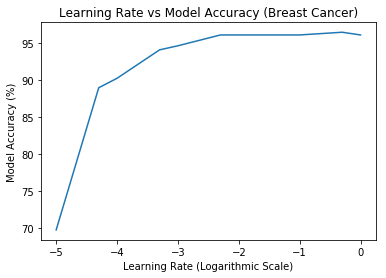

In [39]:
#Test Logisitc Regression over different learning rates

#May need to play around with num_steps and min_error (stopping requirement)

#Initialize
learning_rates = [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.00001]
lr_accuracy = []

for learning_rate in learning_rates:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 25000, learning_rate = learning_rate, min_error = 1e-2, random_shuffle = False)
    lr_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(np.log10(learning_rates), lr_accuracy)
plt.title("Learning Rate vs Model Accuracy (Breast Cancer)")
plt.xlabel("Learning Rate (Logarithmic Scale)")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 214
Minimum Cost (J) = 0.3894514641914765
Weights of Model:  [-0.40299381 -0.23836608  0.23830417  0.1787965   0.06661727 -0.22022049
  0.29399039 -0.16491559  0.16501602 -0.09463063]
Accuracy:  86.23853211009175 %
Error Rate:  13.761467889908257 %
Precision:  79.06976744186046 %
Recall:  85.0 % 

Number of Iterations = 222
Minimum Cost (J) = 0.3811488789338674
Weights of Model:  [-0.41359009 -0.24519113  0.23573574  0.21870227  0.04969982 -0.24821834
  0.31938698 -0.14390081  0.13360189 -0.07389305]
Accuracy:  89.90825688073394 %
Error Rate:  10.091743119266056 %
Precision:  83.72093023255815 %
Recall:  90.0 % 

Number of Iterations = 208
Minimum Cost (J) = 0.398464863591226
Weights of Model:  [-0.38333644 -0.18760887  0.23132447  0.17102927  0.06696749 -0.2599082
  0.29588203 -0.16434034  0.13174007 -0.08242638]
Accuracy:  91.74311926605505 %
Error Rate:  8.256880733944955 %
Precision:  81.3953488372093 %
Recall:  97.22222222222221 % 

Number of Iterations = 21

Number of Iterations = 4999
Minimum Cost (J) = 0.1471907702080013
Weights of Model:  [-3.34849658 -0.02167751  0.35371713  0.15763173  0.15353657 -0.24330546
  0.39147366 -0.08113693  0.24709562  0.01151086]
Accuracy:  95.41284403669725 %
Error Rate:  4.587155963302752 %
Precision:  94.87179487179486 %
Recall:  92.5 % 

Number of Iterations = 4999
Minimum Cost (J) = 0.13298408735645093
Weights of Model:  [-3.38865801 -0.03129112  0.39181687  0.22692645  0.08357865 -0.41208718
  0.47144344 -0.05165466  0.24828644  0.12738537]
Accuracy:  93.57798165137615 %
Error Rate:  6.422018348623854 %
Precision:  92.3076923076923 %
Recall:  90.0 % 

Number of Iterations = 4999
Minimum Cost (J) = 0.1533610149151045
Weights of Model:  [-3.35258543  0.05386139  0.36894127  0.23286772  0.13247204 -0.36210869
  0.34575234 -0.08667839  0.2341755   0.08176001]
Accuracy:  98.1651376146789 %
Error Rate:  1.834862385321101 %
Precision:  97.22222222222221 %
Recall:  97.22222222222221 % 

Number of Iterations =

Text(0, 0.5, 'Model Accuracy (%)')

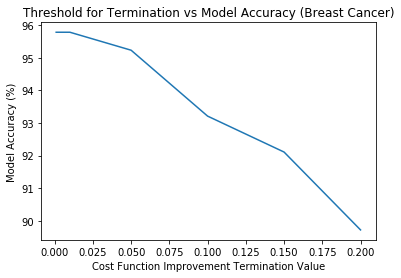

In [40]:
#Threshold of change in value of cost function as termination criteria
#Test Logisitc Regression over different thresholds of cost function improvement

#Initialize
termination_thresholds = [0.2, 0.15, 0.1, 0.05, 0.01, 0.005, 0.001] 
lr_accuracy = []

for threshold in termination_thresholds:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 5000, learning_rate = 0.01, min_error = threshold, random_shuffle = False)
    lr_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(termination_thresholds, lr_accuracy)
plt.title("Threshold for Termination vs Model Accuracy (Breast Cancer)")
plt.xlabel("Cost Function Improvement Termination Value")
plt.ylabel("Model Accuracy (%)")

Number of Iterations = 99
Minimum Cost (J) = 0.45943404065079396
Weights of Model:  [-0.21346107 -0.16873176  0.14898218  0.12032873  0.04408311 -0.13156
  0.20243585 -0.09324414  0.10696511 -0.06410924]
Accuracy:  84.40366972477065 %
Error Rate:  15.59633027522936 %
Precision:  75.55555555555556 %
Recall:  85.0 % 

Number of Iterations = 99
Minimum Cost (J) = 0.45662245511460353
Weights of Model:  [-0.21241199 -0.17279361  0.14463454  0.14107429  0.03425911 -0.13847857
  0.21713996 -0.07843833  0.08074005 -0.05386083]
Accuracy:  88.9908256880734 %
Error Rate:  11.009174311926607 %
Precision:  81.81818181818183 %
Recall:  90.0 % 

Number of Iterations = 99
Minimum Cost (J) = 0.46349165593928776
Weights of Model:  [-0.20772534 -0.1424625   0.14715445  0.11650277  0.04987449 -0.15735465
  0.21048291 -0.09399631  0.0819058  -0.05717901]
Accuracy:  89.90825688073394 %
Error Rate:  10.091743119266056 %
Precision:  77.77777777777779 %
Recall:  97.22222222222221 % 

Number of Iterations = 99


Number of Iterations = 2499
Minimum Cost (J) = 0.1840526725671253
Weights of Model:  [-2.29176257 -0.14824647  0.47301907  0.26833621  0.09438468 -0.51321793
  0.48676821 -0.16376011  0.2492275   0.05480946]
Accuracy:  93.57798165137615 %
Error Rate:  6.422018348623854 %
Precision:  92.3076923076923 %
Recall:  90.0 % 

Number of Iterations = 2499
Minimum Cost (J) = 0.20476881395916585
Weights of Model:  [-2.25588693 -0.05256106  0.48691878  0.21987505  0.12369464 -0.46247708
  0.37639627 -0.21106599  0.25505184 -0.00470238]
Accuracy:  97.24770642201835 %
Error Rate:  2.7522935779816518 %
Precision:  94.5945945945946 %
Recall:  97.22222222222221 % 

Number of Iterations = 2499
Minimum Cost (J) = 0.19531811538517274
Weights of Model:  [-2.17819385 -0.13990468  0.47161263  0.31430891  0.1594234  -0.50808707
  0.45724685 -0.21719001  0.2342802  -0.04843294]
Accuracy:  92.66055045871559 %
Error Rate:  7.339449541284404 %
Precision:  90.32258064516128 %
Recall:  84.84848484848484 % 

Number 

Number of Iterations = 4999
Minimum Cost (J) = 0.1471907702080013
Weights of Model:  [-3.34849658 -0.02167751  0.35371713  0.15763173  0.15353657 -0.24330546
  0.39147366 -0.08113693  0.24709562  0.01151086]
Accuracy:  95.41284403669725 %
Error Rate:  4.587155963302752 %
Precision:  94.87179487179486 %
Recall:  92.5 % 

Number of Iterations = 4999
Minimum Cost (J) = 0.13298408735645093
Weights of Model:  [-3.38865801 -0.03129112  0.39181687  0.22692645  0.08357865 -0.41208718
  0.47144344 -0.05165466  0.24828644  0.12738537]
Accuracy:  93.57798165137615 %
Error Rate:  6.422018348623854 %
Precision:  92.3076923076923 %
Recall:  90.0 % 

Number of Iterations = 4999
Minimum Cost (J) = 0.1533610149151045
Weights of Model:  [-3.35258543  0.05386139  0.36894127  0.23286772  0.13247204 -0.36210869
  0.34575234 -0.08667839  0.2341755   0.08176001]
Accuracy:  98.1651376146789 %
Error Rate:  1.834862385321101 %
Precision:  97.22222222222221 %
Recall:  97.22222222222221 % 

Number of Iterations =

Number of Iterations = 7499
Minimum Cost (J) = 0.12363260953950285
Weights of Model:  [-4.09157389  0.04677222  0.26268137  0.16559329  0.15601515 -0.15177352
  0.37375565  0.0107171   0.23415717  0.04917593]
Accuracy:  95.41284403669725 %
Error Rate:  4.587155963302752 %
Precision:  94.87179487179486 %
Recall:  92.5 % 

Number of Iterations = 7499
Minimum Cost (J) = 0.10953085108586773
Weights of Model:  [-4.13474038  0.04197132  0.31428471  0.22377354  0.08877976 -0.33702095
  0.45940325  0.02268611  0.2478159   0.17008618]
Accuracy:  92.66055045871559 %
Error Rate:  7.339449541284404 %
Precision:  92.10526315789474 %
Recall:  87.5 % 

Number of Iterations = 7499
Minimum Cost (J) = 0.12971019597930075
Weights of Model:  [-4.09818567  0.12090925  0.2656703   0.26766075  0.14876835 -0.29761781
  0.33371493 -0.01048088  0.22476059  0.13780477]
Accuracy:  98.1651376146789 %
Error Rate:  1.834862385321101 %
Precision:  97.22222222222221 %
Recall:  97.22222222222221 % 

Number of Iteration

Number of Iterations = 9999
Minimum Cost (J) = 0.11022366439813233
Weights of Model:  [-4.65558989  0.09353973  0.19779595  0.1788957   0.1633609  -0.0904586
  0.36588882  0.07375755  0.22857692  0.07893567]
Accuracy:  95.41284403669725 %
Error Rate:  4.587155963302752 %
Precision:  92.6829268292683 %
Recall:  95.0 % 

Number of Iterations = 9999
Minimum Cost (J) = 0.09621484094827802
Weights of Model:  [-4.69905052  0.09372797  0.25689978  0.22849396  0.09812766 -0.28711207
  0.45358123  0.07765164  0.24765     0.20342855]
Accuracy:  91.74311926605505 %
Error Rate:  8.256880733944955 %
Precision:  89.74358974358975 %
Recall:  87.5 % 

Number of Iterations = 9999
Minimum Cost (J) = 0.11649473993954064
Weights of Model:  [-4.65808194  0.16907014  0.19205624  0.29771692  0.16736968 -0.25782042
  0.33016044  0.04162333  0.21966397  0.17947281]
Accuracy:  98.1651376146789 %
Error Rate:  1.834862385321101 %
Precision:  97.22222222222221 %
Recall:  97.22222222222221 % 

Number of Iterations 

Text(0, 0.5, 'Model Accuracy (%)')

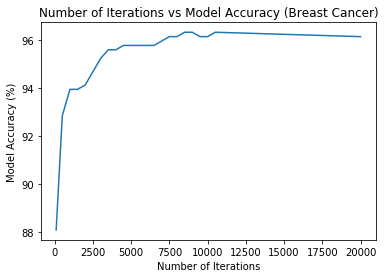

In [41]:
#Plot Accuracy of Train/Validation Set as a Function of Iterations of Gradient Descent
#Limit number of steps

#Initialize
number_of_iterations = [100, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 20000]
lr_accuracy = []

for num_steps in number_of_iterations:
    
    average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = num_steps, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
    lr_accuracy.append(average_cross_validation_accuracy)

#Plot
plt.plot(number_of_iterations, lr_accuracy)
plt.title("Number of Iterations vs Model Accuracy (Breast Cancer)")
plt.xlabel("Number of Iterations")
plt.ylabel("Model Accuracy (%)")


Number of Iterations = 4999
Minimum Cost (J) = 0.1471907702080013
Weights of Model:  [-3.34849658 -0.02167751  0.35371713  0.15763173  0.15353657 -0.24330546
  0.39147366 -0.08113693  0.24709562  0.01151086]
Accuracy:  95.41284403669725 %
Error Rate:  4.587155963302752 %
Precision:  94.87179487179486 %
Recall:  92.5 % 

Number of Iterations = 4999
Minimum Cost (J) = 0.13298408735645093
Weights of Model:  [-3.38865801 -0.03129112  0.39181687  0.22692645  0.08357865 -0.41208718
  0.47144344 -0.05165466  0.24828644  0.12738537]
Accuracy:  93.57798165137615 %
Error Rate:  6.422018348623854 %
Precision:  92.3076923076923 %
Recall:  90.0 % 

Number of Iterations = 4999
Minimum Cost (J) = 0.1533610149151045
Weights of Model:  [-3.35258543  0.05386139  0.36894127  0.23286772  0.13247204 -0.36210869
  0.34575234 -0.08667839  0.2341755   0.08176001]
Accuracy:  98.1651376146789 %
Error Rate:  1.834862385321101 %
Precision:  97.22222222222221 %
Recall:  97.22222222222221 % 

Number of Iterations =

Number of Iterations = 4999
Minimum Cost (J) = 0.16214054035516703
Weights of Model:  [-3.34849174  0.15686051  0.3474699   0.37442191  0.15211829 -0.45550801
  0.23551201  0.01532976  0.11214515 -0.04646496]
Accuracy:  98.14814814814815 %
Error Rate:  1.8518518518518516 %
Precision:  100.0 %
Recall:  95.23809523809523 % 

average cross validation model accuracy = 93.70370370370371% 

Accuracy:  90.74074074074075 %
Error Rate:  9.25925925925926 %
Precision:  100.0 %
Recall:  75.0 % 

Accuracy:  79.62962962962963 %
Error Rate:  20.37037037037037 %
Precision:  84.61538461538461 %
Recall:  55.00000000000001 % 

Accuracy:  77.77777777777779 %
Error Rate:  22.22222222222222 %
Precision:  100.0 %
Recall:  42.857142857142854 % 

Accuracy:  74.07407407407408 %
Error Rate:  25.925925925925924 %
Precision:  71.42857142857143 %
Recall:  29.411764705882355 % 

Accuracy:  77.77777777777779 %
Error Rate:  22.22222222222222 %
Precision:  90.9090909090909 %
Recall:  47.61904761904761 % 

average cross

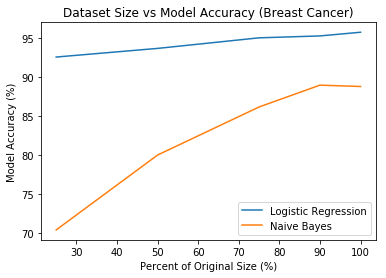

In [77]:
#Adjust size of datasets and compare accuracy
#Compare 5 different sizes

length = int(len(x_train))
length90 = int(length*0.9)
length75 = int(length*0.75)
length50 = int(length*0.5)
length25 = int(length*0.25)
length10 = int(length*0.1)

x_train_reduced = [x_train[:length90,:], x_train[:length75,:], x_train[:length50,:], x_train[:length25,:], x_train[:length10,:]] 
y_train_reduced = [y_train[:length90], y_train[:length75], y_train[:length50], y_train[:length25], y_train[:length10]]
percentage_of_original = [100, 90, 75, 50, 25]
lr_accuracy = []
nb_accuracy = []

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train, y_train, K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train, y_train, K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)


lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length90,:], y_train[:length90], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length90,:], y_train[:length90], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length75,:], y_train[:length75], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length75,:], y_train[:length75], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length50,:], y_train[:length50], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length50,:], y_train[:length50], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length25,:], y_train[:length25], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length25,:], y_train[:length25], K = 5, random_shuffle = False)
lr_accuracy.append(lr_average_cross_validation_accuracy)
nb_accuracy.append(nb_average_cross_validation_accuracy)

#lr_average_cross_validation_accuracy = cross_validation_LR(Model_Logistic_Regression, x_train[:length10,:], y_train[:length10], K = 5, num_steps = 5000, learning_rate = 0.01, min_error = 1e-2, random_shuffle = False)
#nb_average_cross_validation_accuracy = cross_validation_NB(Model_Naive_Bayes, x_train[:length10,:], y_train[:length10], K = 5, random_shuffle = False)
#lr_accuracy.append(lr_average_cross_validation_accuracy)
#nb_accuracy.append(nb_average_cross_validation_accuracy)
        

#Plot
plt.plot(percentage_of_original, lr_accuracy)
plt.plot(percentage_of_original, nb_accuracy)
plt.title("Dataset Size vs Model Accuracy (Breast Cancer)")
plt.xlabel("Percent of Original Size (%)")
plt.ylabel("Model Accuracy (%)")
plt.legend(["Logistic Regression", "Naive Bayes"])


Number of Iterations = 4999
Minimum Cost (J) = 0.14755923457877893
Weights of Model:  [-3.35963168  0.01325988  0.35246235  0.23285905  0.12537747 -0.33584999
  0.38521963 -0.06271908  0.20951595  0.07589413]
Accuracy:  97.08029197080292 %
Error Rate:  2.9197080291970803 %
Precision:  97.91666666666666 %
Recall:  94.0 % 

Number of Iterations = 4999
Minimum Cost (J) = 0.14842450461534942
Weights of Model:  [-3.38319305  0.02663874  0.38241785  0.20977609  0.10899646 -0.30565464
  0.34969659 -0.0579119   0.18633252  0.09378719]
Accuracy:  97.08029197080292 %
Error Rate:  2.9197080291970803 %
Precision:  97.91666666666666 %
Recall:  94.0 % 

Number of Iterations = 4999
Minimum Cost (J) = 0.15069898403480395
Weights of Model:  [-3.46150369e+00  5.81003315e-02  2.97694512e-01  2.58996588e-01
  1.09007088e-01 -2.83620485e-01  3.19018838e-01 -2.36923332e-04
  1.40600527e-01  9.20421665e-02]
Accuracy:  96.35036496350365 %
Error Rate:  3.64963503649635 %
Precision:  95.91836734693877 %
Recall:

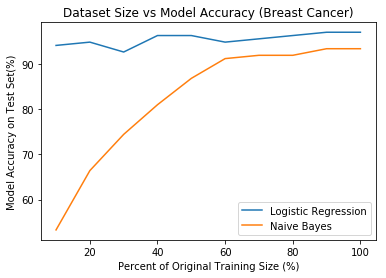

In [78]:
#The Accuracy of the Test set based on different sizes of the training set
#Need to choose optimum hyper-parameters on Logistic Regression

length = int(len(x_train))
length90 = int(length*0.90)
length80 = int(length*0.80)
length70 = int(length*0.70)
length60 = int(length*0.60)
length50 = int(length*0.50)
length40 = int(length*0.40)
length30 = int(length*0.30)
length20 = int(length*0.20)
length10 = int(length*0.10)

x_train_reduced = [x_train, x_train[:length90,:], x_train[:length80,:], x_train[:length70,:],x_train[:length60,:], x_train[:length50,:], x_train[:length40,:],x_train[:length30,:], x_train[:length20,:], x_train[:length10,:]] 
y_train_reduced = [y_train, y_train[:length90], y_train[:length80], y_train[:length70], y_train[:length60], y_train[:length50], y_train[:length40], y_train[:length30], y_train[:length20], y_train[:length10]]
percentage_of_original = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
LR_accuracy = []
NB_accuracy = []


model_LR = LogisticRegression(intercept = True)
for i in range(len(x_train_reduced)):
    w = model_LR.fit(x_train_reduced[i], y_train_reduced[i], num_steps = 5000, learning_rate = 0.01, min_error = 1e-2)            
    
    y_pred = model_LR.predict(x_test, w)
    
    accuracy = model_LR.evaluate_acc(y_test, y_pred)
    LR_accuracy.append(accuracy)


model_NB = MultinomialNaiveBayes()
for i in range(len(x_train_reduced)):
    likelihoods, neg_prior,pos_prior = model_NB.fit(x_train_reduced[i], y_train_reduced[i])
    
    y_pred = model_NB.predict(x_test,likelihoods, neg_prior,pos_prior)
    
    accuracy = model_NB.evaluate_acc(y_test,y_pred)
    NB_accuracy.append(accuracy)
    

#Plot
plt.plot(percentage_of_original, LR_accuracy)
plt.plot(percentage_of_original, NB_accuracy)
plt.title("Training Set Size vs Model Accuracy (Breast Cancer)")
plt.xlabel("Percent of Original Training Size (%)")
plt.ylabel("Model Accuracy on Test Set(%)")
plt.legend(["Logistic Regression", "Naive Bayes"])


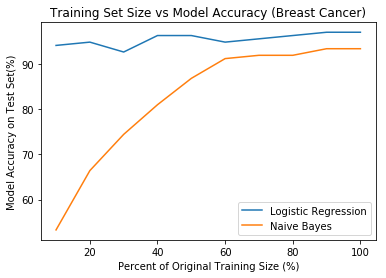

In [79]:

#Plot
plt.plot(percentage_of_original, LR_accuracy)
plt.plot(percentage_of_original, NB_accuracy)
plt.title("Training Set Size vs Model Accuracy (Breast Cancer)")
plt.xlabel("Percent of Original Training Size (%)")
plt.ylabel("Model Accuracy on Test Set(%)")
plt.legend(["Logistic Regression", "Naive Bayes"])

In [61]:
#Investigate other Stopping Criteria (Increasing Error on Validation Set)
